In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [24]:
start = '2010-01-01'
end = '2024-10-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.447414,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.355824,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.386255,7.570714,7.571429,7.466429,7.510714,447610800


In [25]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-10-24,230.316620,230.570007,230.820007,228.410004,229.979996,31109500
2024-10-25,231.155685,231.410004,233.220001,229.570007,229.740005,38802300
2024-10-28,233.143494,233.399994,234.729996,232.550003,233.320007,36087100
2024-10-29,233.413193,233.669998,234.330002,232.320007,233.100006,35417200
2024-10-30,229.847122,230.100006,233.470001,229.550003,232.610001,47070900


In [26]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447414,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.355824,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.386255,7.570714,7.571429,7.466429,7.510714,447610800


In [27]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

C:\Users\aksah\AppData\Local\Temp\ipykernel_151900\4261181942.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


<Axes: >

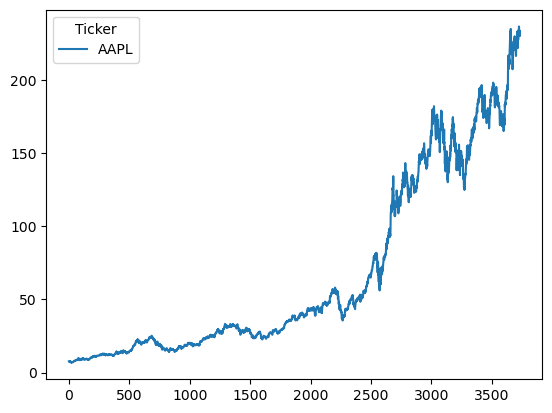

In [28]:
df.plot.line(y="Close", use_index=True)

In [29]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

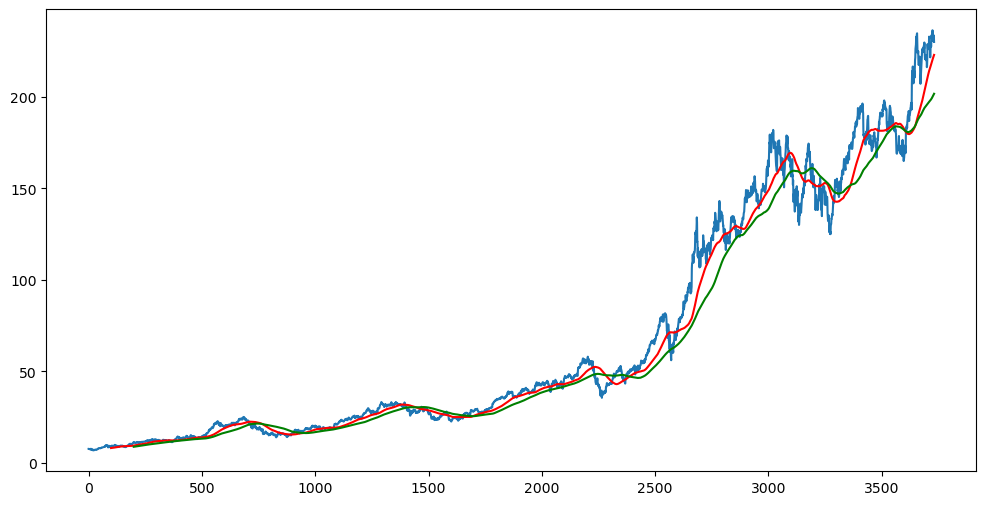

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [9]:
df.shape

(3732, 5)

In [31]:
training = pd.DataFrame(df['Close'][0:int(len(df) * 0.7)])
testing = pd.DataFrame(df['Close'][int(len(df) * 0.7):int(len(df))])

print(testing.shape)
print(training.shape)

(1120, 1)
(2612, 1)


In [32]:
training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

training_array = scaler.fit_transform(training)
training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.93498218],
       [0.95916785],
       [0.95309649]])

In [34]:
x_train = []
y_train = []

training_array.shape

(2612, 1)

In [35]:
for i in range(100, training_array.shape[0]):
    
    x_train.append(training_array[i - 100 : i])
    y_train.append(training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
    

In [36]:
import sys
print(sys.executable)

C:\Users\aksah\anaconda3.0\python.exe


In [37]:
!pip show keras


Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: C:\Users\aksah\anaconda3.0\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel


In [38]:
!pip install keras

In [39]:
!pip install tensorflow

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Initialize the model
model = Sequential()

In [40]:
x_train.shape

(2512, 100, 1)

In [41]:
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=80, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\aksah\anaconda3.0\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 80)                  │          51,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,761 (522.50 KB)

 Trainable params: 133,761 (522.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 59s 410ms/step - loss: 0.0447
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - loss: 0.0066
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 243ms/step - loss: 0.0053
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 355ms/step - loss: 0.0046
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - loss: 0.0053
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 330ms/step - loss: 0.0040
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2742s 35s/step - loss: 0.0041
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 308ms/step - loss: 0.0035
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0029
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - loss: 0.0030
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 357ms/step - loss: 0.0032
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 295ms/step - loss: 0.0027
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - loss: 0.0029
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - loss: 0.0027
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 32

In [45]:
model.save('keras_model.h5')

In [46]:
testing.head()

Ticker,AAPL
2612,79.807503
2613,79.212502
2614,79.722504
2615,79.182503
2616,79.527496


In [47]:
past_100_days = training.tail(100)

In [48]:
final_df = pd.concat([past_100_days, testing], ignore_index=True)


In [49]:
final_df.head()

Ticker,AAPL
0,72.477501
1,72.449997
2,72.879997
3,73.412498
4,75.087502


In [50]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.09083225],
       [0.09067978],
       [0.09306354],
       ...,
       [0.98292564],
       [0.98442244],
       [0.96463175]])

In [51]:
input_data.shape

(1220, 1)

In [52]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1120, 100, 1)
(1120,)


In [53]:
y_predicted = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [54]:
y_predicted.shape

(1120, 1)

In [55]:
scaler.scale_

array([0.00554362])

In [56]:
scale_factor = 1 / 0.00554362

In [59]:
y_predicted = y_predicted *  scale_factor
y_test = y_test * scale_factor

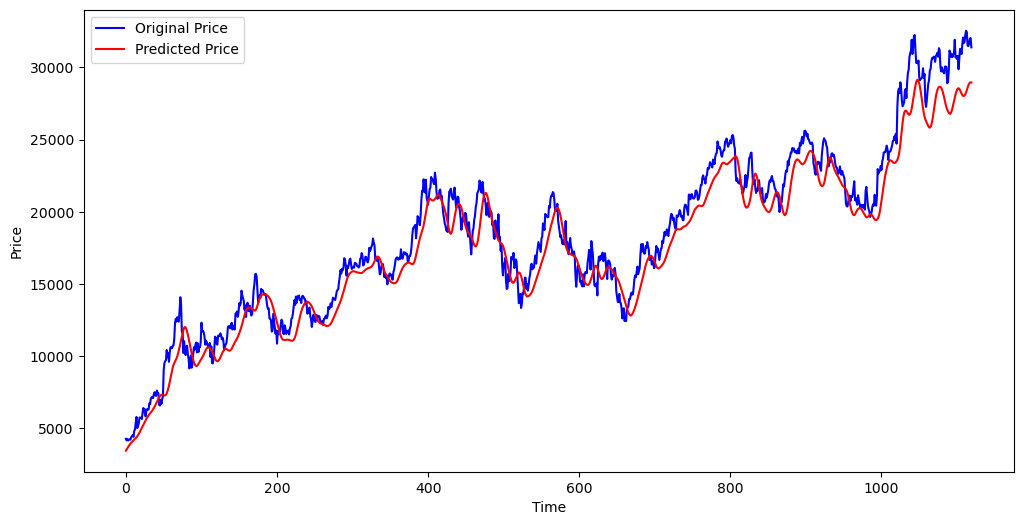

In [60]:
fig2 = plt.figure(figsize= (12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()